## Chapter 9

In this case study we introduce multidimensional scaling (MDS), a technique for visually displaying the simialrity of observations in mutlidimensional space. We begin with with a very simple example using simulated  data. Next, we perform the same analysis on real data, using Senate roll call vote data. We first must get this data into workable format, then analyze with MDS.

Data Used: *.dta files in code/data/, source: http://www.voteview.com/dwnl.htm

First code snippet

In [1]:
import pandas as pd
import numpy as np
import random

#random_array = np.random.randint(-1, 2, 24).reshape(4,6)
random_array = np.array([0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1]).reshape(4,6)

row_names = ['A', 'B', 'C', 'D']
col_names = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6']
df = pd.DataFrame(random_array, columns=col_names, index=row_names)

Second code snippet

In [2]:
df

,P1,P2,P3,P4,P5,P6
A,0,0,0,0,0,0
B,-1,-1,-1,-1,-1,-1
C,1,1,1,1,1,1
D,0,0,0,0,0,1


Third code snippet

Convert matrix to customer-by-customer matrix

In [3]:
df.transpose()

,A,B,C,D
P1,0,-1,1,0
P2,0,-1,1,0
P3,0,-1,1,0
P4,0,-1,1,0
P5,0,-1,1,0
P6,0,-1,1,1


Fourth code snippet

Calculate distance matrix

In [4]:
dm = np.matmul(df, df.transpose())
dm

array([[ 0,  0,  0,  0],
       [ 0,  6, -6, -1],
       [ 0, -6,  6,  1],
       [ 0, -1,  1,  1]])

Fifth code snippet

In [5]:
np.sqrt(sum((dm[0, ] - dm[3, ]) ^ 2))

C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


nan

In [6]:
from scipy.spatial import distance_matrix

dm = distance_matrix(df.values, df.values)
dm

array([[0.        , 2.44948974, 2.44948974, 1.        ],
       [2.44948974, 0.        , 4.89897949, 3.        ],
       [2.44948974, 4.89897949, 0.        , 2.23606798],
       [1.        , 3.        , 2.23606798, 0.        ]])

Sixth code snippet

Visualize clusters

In [7]:
from sklearn.manifold import MDS

embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(dm)

def column(matrix, i):
    return [row[i] for row in matrix]

C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\mds.py:411: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


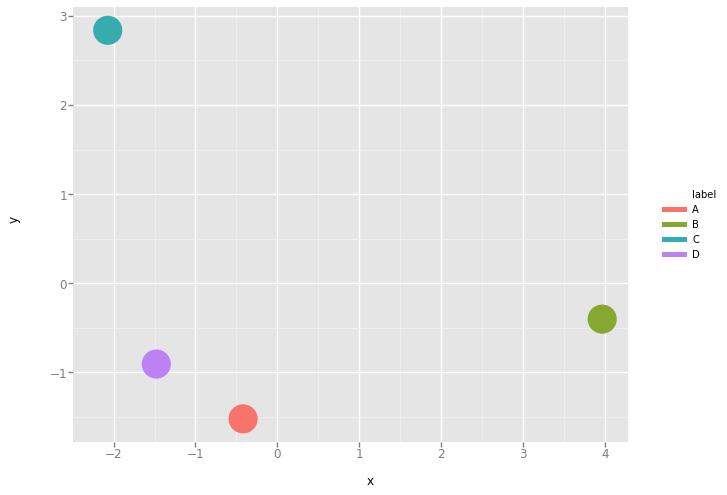

<ggplot: (-9223371921811867090)>

In [8]:
%matplotlib inline
from ggplot import *

x = column(X_transformed, 0)
y = column(X_transformed, 1)
label = ['A', 'B', 'C', 'D']

df = pd.DataFrame(dict(x=x, y=y, label=label))
p = ggplot(aes(x='x', y='y', color='label'), data=df)
p += geom_point(size=850)

p

Seventh code snippet

In [9]:
from os import listdir
from os.path import isfile, join

path = "data/roll_call"
data_files = [f for f in listdir(path) if isfile(join(path, f))]
data_files

['sen101kh.dta',
 'sen102kh.dta',
 'sen103kh.dta',
 'sen104kh.dta',
 'sen105kh.dta',
 'sen106kh.dta',
 'sen107kh.dta',
 'sen108kh_7.dta',
 'sen109kh.dta',
 'sen110kh_2008.dta',
 'sen111kh.dta']

Eighth code snippet

Add all roll call vote data frames to a single list

In [10]:
import pandas as pd

data = []

for file_name in data_files:
    try:
        data.append(pd.read_stata(path + "/" + file_name))
    except ValueError:
        print("Incorrect file: " + file_name + ". File was omitted.")
        

Incorrect file: sen102kh.dta. File was omitted.
Incorrect file: sen103kh.dta. File was omitted.
Incorrect file: sen105kh.dta. File was omitted.
Incorrect file: sen106kh.dta. File was omitted.
Incorrect file: sen110kh_2008.dta. File was omitted.


Ninth code snippet

In [11]:
data[0].shape

(103, 647)

In [12]:
data[0].head()

,cong,id,state,dist,lstate,party,eh1,eh2,name,V1,...,V629,V630,V631,V632,V633,V634,V635,V636,V637,V638
0,101,99908,99,0,USA,200,0,0,BUSH,1,...,9,9,9,9,9,9,9,9,9,1
1,101,14659,41,0,ALABAMA,100,0,1,"SHELBY, RIC",1,...,1,1,1,1,1,1,1,1,1,6
2,101,14705,41,0,ALABAMA,100,0,1,"HEFLIN, HOW",1,...,1,1,1,1,1,1,1,1,1,6
3,101,12109,81,0,ALASKA,200,0,1,"STEVENS, TH",1,...,1,1,1,1,6,6,1,1,1,1
4,101,14907,81,0,ALASKA,200,0,1,"MURKOWSKI,",1,...,1,1,1,1,6,6,1,1,1,6


Tenth code snippet

This function takes a single data frame of roll call votes and returns a Senator-by-vote matrix.